# I. Quality tools

## 0 Preparation

In [1]:
PATH = 'C:\\Users\\benoi\\OneDrive\\Documents\\20.3 Informatique\\Data Science\\2_instructions\\scripts\\q7\\'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import sys
import os

import std_q7
import std_histogram

In [3]:
def upload_csv(path, file, df_variable, df_name):
    df_variable = pd.read_csv(path + file,
                              sep=';',
                              error_bad_lines=False)
    df_variable.name = df_name
    return df_variable


isf_df = upload_csv(path=PATH,
                      file='isf.csv',
                      df_variable='isf_df',
                      df_name='ISF Dataframe')

C:\Users\benoi\AppData\Local\Temp/ipykernel_29216/1773872223.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  isf_df = upload_csv(path=PATH,


## 1 Checksheet

## 2 Histogram

C:\Users\benoi\OneDrive\Documents\20.3 Informatique\Data Science\2_instructions\scripts\q7\std_histogram.py:84: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(5.0)
c:\users\benoi\onedrive\documents\20.3 informatique\data science\2_instructions\scripts\q7\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Value
Purpose,Examinate the differences of distributions
Scale,France
Process,Tax
Line,N/A
Product,French taxpayers
Date,31/12/2016
Shift,N/A
Divers,This is a test on how histograms work.


<Figure size 432x288 with 0 Axes>

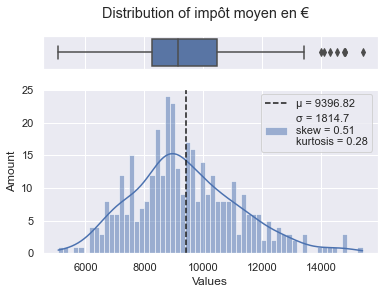

In [4]:
test_hist = std_histogram.Histogram(dataframe=isf_df,
                                    feature='impôt moyen en €')

test_hist.purpose = 'Examinate the differences of distributions'
test_hist.scale = 'France'
test_hist.process = 'Tax'
test_hist.line = 'N/A'
test_hist.product = 'French taxpayers'
test_hist.date = '31/12/2016'
test_hist.shift = 'N/A'
test_hist.divers = 'This is a test on how histograms work.'

# Plot
test_hist.plot(quantile_sup=0.97, quantile_inf=0)

## 3 Control chart

In [ ]:
mails_df = upload_csv(path=PATH,
                      file='mails.csv',
                      df_variable='mails_df',
                      df_name='Outlook mails dataframe')
mails_df.set_index('Semaine', inplace=True)

In [ ]:
import math
import pandas as pd
import statistics as stat

from matplotlib.patches import Ellipse, Circle

class ControlChart():#QualityTool):
    '''
    A QC tool designed to:
    - reveal the state of control of a process,
    - identify the outliers,
    - warn the user when the process becomes out of control,
    - provide a basis for decision taking and action.
    '''
    def __init__(self,
                 data,
                 feature_name,
                 chart_type='x/r',
                 reverse=False):
        '''

        '''
        self.data = data
        self.feature_name = feature_name
        if reverse == False:
            self.orientation = 'line'
        else:
            self.orientation = 'column'


    def array_compute(self):
        '''

        '''
        # Number of batches
        n_batchs = self.data.shape[1]
        # Number of samples per batches
        n_samples = self.data.shape[0]

        # --------------
        # AVERAGES
        # --------------
        # Compute the values
        x_bar_list = [round(element, 1) for element in self.data.mean(axis=0)]
        # Compute the mean
        x_bar_bar = [stat.mean(x_bar_list)] * len(x_bar_list)
        # --------------
        # RANGES
        # --------------
        # Compute the values
        max_list = [round(element, 1) for element in self.data.max(axis=0)]
        min_list = [round(element, 1) for element in self.data.min(axis=0)]
        # Compute the mean
        r_list = []
        zip_object = zip(max_list, min_list)
        for max_list, min_list in zip_object:
            r_list.append(max_list - min_list)
        r_bar = [stat.mean(r_list)] * len(r_list)

        # --------------
        # CONTROL LIMITS
        # --------------
        constants_df = upload_csv(path=PATH,
                                  file='3_constants.csv',
                                  df_variable='constants_df',
                                  df_name='Constants dataframe')
        constants_df.set_index('sample size', inplace=True)
        # A2
        self.A2 = constants_df.loc[n_samples]['A2']
        self.A2 = float(self.A2)
        # D3
        self.D3 = constants_df.loc[n_samples]['D3']
        self.D3 = float(self.D3)
        # D4
        self.D4 = constants_df.loc[n_samples ]['D4']
        self.D4 = float(self.D4)
        # Averages
        x_bar_ucl = [x_bar_bar[0] + r_bar[0]*self.A2] * len(r_list)
        x_bar_lcl = [x_bar_bar[0] - r_bar[0]*self.A2] * len(r_list)
        # Ranges
        r_ucl = [r_bar[0] * self.D4] * len(r_list)
        r_lcl = [r_bar[0] * self.D3] * len(r_list)

        return [x_bar_list, x_bar_bar,
                r_list, r_bar,
                x_bar_ucl, x_bar_lcl,
                r_ucl, r_lcl]


    def get_outliers(self, values, ucl, lcl):
        '''
        Find the outliers and returns their coordinates in a list.
        '''
        # Identify the outliers
        outliers_coord = []
        for i, value in enumerate(values):
            if value > ucl or value < lcl:
                outlier_x = i
                outlier_y = values[i]
                outliers_coord.append((outlier_x, outlier_y))

        return outliers_coord


    def outliers_circles(self, coord_x, coord_y, ucl, lcl, len):
        '''

        '''
        control_range = ucl - lcl
        ellipse = Ellipse((coord_x, coord_y),
                          len/12, (control_range)/2,
                          edgecolor='red', fill=False)
        
        return ellipse


    def recompute_cl(self):
        '''

        '''

        return


    def ave_ylim(self, ucl, lcl):
        '''
        Given a list of values, determines which y limits are appropriate
        to have a relevant plot.
        '''
        control_range = ucl - lcl
        ylim_max = ucl + control_range
        ylim_min = lcl - control_range

        return (ylim_min, ylim_max)


    def ran_ylim(self, ucl, lcl):
        '''

        '''
        control_range = ucl - lcl
        ylim_max = 3*control_range + - control_range/10
        ylim_min = 0 - control_range/10

        return (ylim_min, ylim_max)



    def plot_list(self, data_list):
        '''
        
        '''
        

        return x_list, sup_list, inf_list


    def plot_array(self):
        '''

        '''
        # Save the computed values
        [x_bar_list, x_bar_bar,
         r_list, r_bar,
         x_bar_ucl, x_bar_lcl,
         r_ucl, r_lcl] = self.array_compute()
        # Set the size
        data_len = len(x_bar_list)
        fig, axs = plt.subplots(ncols=2, nrows=2, sharex='col',
                                figsize=(math.sqrt(data_len*5), math.sqrt(data_len*3)))
        grid = plt.GridSpec(2, 6, wspace=0.3, hspace=0.2)
        ave_chart = plt.subplot(grid[0, :4])
        ave_hist = plt.subplot(grid[0, 4:])
        ran_chart = plt.subplot(grid[1, :4])
        ran_hist = plt.subplot(grid[1, 4:])
        fig.suptitle('Control chart: {}'.format(self.feature_name))
        # Set same xlim and ylim for the corresponding plots
        ave_ylim = (self.ave_ylim(x_bar_ucl[0], x_bar_lcl[0]))
        ran_ylim = (self.ran_ylim(r_ucl[0], r_lcl[0]))
        hist_xlim = (0, data_len)

        # ------------------
        # AVERAGES CHART
        # ------------------
        # Display parameters
        ave_chart.set_title('Averages')
        ave_chart.set_ylim(ave_ylim)
        major_ticks = np.arange(0, 20, 5)
        ave_chart.grid(axis='x')
        ave_chart.set_xticks(major_ticks)
        ave_chart.grid(axis='x')
        # Plot values
        ave_chart.plot(x_bar_list, 'o-', color='k', markerfacecolor='orange',
                    markersize = 8, linewidth=1)
        # Average of averages
        ave_chart.plot(x_bar_bar, color='k')
        # UCL and LCL
        ave_chart.plot(x_bar_ucl, '-', color='orange', linewidth=1)
        ave_chart.text(x=len(x_bar_list)-2, y=x_bar_ucl[0]+1, s='UCL')
        ave_chart.plot(x_bar_lcl, '-', color='orange', linewidth=1)
        ave_chart.text(x=len(x_bar_list)-2, y=x_bar_lcl[0]-2, s='LCL')
        # Outliers
        x_outliers_coord = self.get_outliers(x_bar_list, x_bar_ucl[0], x_bar_lcl[0])
        for outlier in x_outliers_coord:
            ave_chart.add_artist(self.outliers_circles(
                    outlier[0], outlier[1], x_bar_ucl[0], x_bar_lcl[0], data_len))
        # ------------------
        # AVERAGES HISTOGRAM
        # ------------------
        # Display parameters
        ave_hist.set_xlim(hist_xlim)
        ave_hist.set_ylim(ave_ylim)
        ave_hist.grid(axis='x')
        ave_hist.grid(axis='y')
        ave_hist.get_xaxis().set_visible(True)
        ave_hist.get_yaxis().set_visible(True)
        ave_hist.grid(axis='x')
        ave_hist.grid(axis='y')
        # Plot values
        ave_hist.hist(x_bar_list, orientation='horizontal',
                      color='orange', edgecolor='k', bins=10)
        
        # ------------------
        # RANGES CHART
        # ------------------
        # Display parameters
        ran_chart.set_title('Ranges')
        ran_chart.set_ylim(ran_ylim)
        ran_chart.grid(axis='x')
        ran_chart.set_xticks(major_ticks)
        ran_chart.grid(axis='x')
        # Plot values
        ran_chart.plot(r_list, 'D-', color='k', markerfacecolor='c',
                    markersize=8, linewidth=1)
        # Average of ranges
        ran_chart.plot(r_bar, color='k')
        # UCL and LCL
        ran_chart.plot(r_ucl, '-', color='c', linewidth=1)
        ran_chart.text(x=len(r_list)-2, y=r_ucl[0]+2, s='UCL')
        ran_chart.plot(r_lcl, '-', color='c', linewidth=1)
        ran_chart.text(x=len(r_list)-2, y=r_lcl[0]-5, s='LCL')
        # Outliers
        r_outliers_coord = self.get_outliers(r_list, r_ucl[0], r_lcl[0])
        for outlier in r_outliers_coord:
            ran_chart.add_artist(
                self.outliers_circles(
                    outlier[0], outlier[1], r_ucl[0], r_lcl[0], data_len))
        # ------------------
        # RANGES HISTOGRAM
        # ------------------
        # Display parameters
        ran_hist.set_xlim(hist_xlim)
        ran_hist.set_ylim(ran_ylim)
        ran_hist.grid(axis='x')
        ran_hist.grid(axis='y')
        ran_hist.get_xaxis().set_visible(True)
        ran_hist.get_yaxis().set_visible(True)
        ran_hist.grid(axis='x')
        ran_hist.grid(axis='y')
        # Plot values
        ran_hist.hist(r_list, orientation='horizontal',
                      color='c', edgecolor='k',bins=10)

        _ = '' # just not to have a perturbative error message
        #return _


    def plot_correctly(self):
        '''

        '''
        if type(self.data) == type(np.array):
            self.plot_array()
        elif isinstance(self.data, list):
            self.plot_list()

In [ ]:
# chart_class = ControlChart(mails_df, 'Mail flow')
# plt.plot(chart_class.plot_array())

In [ ]:
pd.set_option('display.max_colwidth', None)

class SpecialCauseDetector():
    '''

    '''
    def __init__(self, data):
        # data must be of list type
        '''
        '''
        self.data = data
        [self.values, self.mean,
         self.b, self.c,
         self.ucl, self.lcl,
         self.d, self.e] = ControlChart(mails_df, 'Mail flow').array_compute()
        self.mean = self.mean[0]
        self.ucl = self.ucl[0]
        self.lcl = self.lcl[0]
        self.nowarning = 'No warning'
    

    def one_side_sequence(self, n_points=7):
        '''

        '''
        # Form the list of indicators
        indic_list = []
        for i, value in enumerate(self.values):
            if value > self.mean:
                indic_list.append(1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        zeros_string = ''.join([str(element) for element in [0] * n_points])
        ones_string = ''.join([str(element) for element in [1] * n_points])
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if zeros_string in indic_string:
            i = len(indic_string.split(zeros_string)[0])+1
            return 'Warning: sequence of {} or more successive points under the mean value. Starting from point {}.'.format(n_points, i)
        elif ones_string in indic_string:
            i = len(indic_string.split(ones_string)[0])+1
            return 'Warning: sequence of {} or more successive points under the mean value. Starting from point {}.'.format(n_points, i)
        else:
            return self.nowarning


    def monoton_sequence(self, n_points=6):
        '''
        '''
        # Form the list of indicators
        indic_list = []
        for i in range(1, len(self.values)):
            if self.values[i] > self.values[i-1]:
                indic_list.append(1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        zeros_string = ''.join([str(element) for element in [0] * n_points])
        ones_string = ''.join([str(element) for element in [1] * n_points])
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if zeros_string in indic_string:
            i = len(indic_string.split(zeros_string)[0])+1
            return 'Warning: monoton sequence of {} or more successive points. Starting from point {}.'.format(n_points, i)
        elif ones_string in indic_string:
            i = len(indic_string.split(ones_string)[0])+1
            return 'Warning: monoton sequence of {} or more successive points. Starting from point {}.'.format(n_points, i)
        else:
            return self.nowarning


    def wobble_sequence(self, n_points=14):
        '''
        '''
        # Form the list of indicators
        indic_list = []
        for i in range(1, len(self.values)):
            if self.values[i] > self.values[i-1]:
                indic_list.append(1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        wobble_string = ''.join([str(element) for element in ['01'] * int(n_points/2)])
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if wobble_string in indic_string:
            i = len(indic_string.split(wobble_string)[0]) + 1
            return 'Warning: wobble sequence of {} or more successive points. Starting from point {}.'.format(n_points, i)
        else:
            return self.nowarning


    def two_sigma_sequence(self, n_points=3):
        '''
        '''
        indic_list = []
        for value in self.values:
            # Partie sup
            if value - self.mean > (self.ucl - self.lcl)/3 and value < self.ucl:
                indic_list.append(1)
            # Partie inf
            if value - self.mean < -(self.ucl - self.lcl)/3 and value > self.lcl:
                indic_list.append(-1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        str_1 = '101'
        str_2 = '11'
        str_3 = '-10-1'
        str_4 = '-1-1'
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if str_1 in indic_string:
            i = len(indic_string.split(str_1)[0])+1
            return 'Warning: two neighbour points above upper 2-sigma limit. Starting from point {}.'.format(i)
        if str_2 in indic_string:
            i = len(indic_string.split(str_2)[0])+1
            return 'Warning: two successive points above upper 2-sigma limit. Starting from point {}.'.format(i)
        if str_3 in indic_string:
            i = len(indic_string.split(str_3)[0])+1
            return 'Warning: two neighbour points under lower 2-sigma limit. Starting from point {}.'.format(i)
        if str_4 in indic_string:
            i = len(indic_string.split(str_4)[0])+1
            return 'Warning: two successive points under lower 2-sigma limit. Starting from point {}.'.format(i)
        else:
            return self.nowarning

    
    def one_sigma_sequence(self, n_points=5):
        '''
        '''
        indic_list = []
        for value in self.values:
            # Partie sup
            if value - self.mean > (self.ucl - self.lcl)/6 and value < self.ucl:
                indic_list.append(1)
            # Partie inf
            if value - self.mean < -(self.ucl - self.lcl)/6 and value > self.lcl:
                indic_list.append(-1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        up_list = ['01111', '10111', '11011', '11101', '11110']
        low_list = ['0-1-1-1-1', '-10-1-1-1', '-1-10-1-1', '-1-1-10-1', '-1-1-1-10']
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        for string in up_list:
            if string in indic_string:
                i = len(indic_string.split(string)[0]) + 1
                return 'Warning: 4 neighbour points above upper 1-sigma limit. Starting from point {}.'.format(i)
        for string in low_list:
            if string in indic_string:
                i = len(indic_string.split(string)[0]) + 1
                return 'Warning: 4 neighbour points under lower 1-sigma limit. Starting from point {}.'.format(i)
        else:
            return self.nowarning
    

    def central_sequence(self, n_points=15):
        '''
        '''
        indic_list = []
        for value in self.values:
            if abs(value - self.mean) < (self.ucl - self.lcl)/6:
                indic_list.append(1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        ones_string = ''.join([str(element) for element in [1] * n_points])
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if ones_string in indic_string:
            i = len(indic_string.split(ones_string)[0]) + 1
            return 'Warning: central sequence of {} or more successive points. Starting from point {}.'.format(n_points, i)
        else:
            return self.nowarning
    

    def sides_only_sequence(self, n_points=8):
        '''
        '''
        indic_list = []
        for value in self.values:
            if abs(value - self.mean) > (self.ucl - self.lcl)/6:
                indic_list.append(1)
            else:
                indic_list.append(0)
        # Transforming the list in string for comparison
        ones_string = ''.join([str(element) for element in [1] * n_points])
        indic_string = ''.join([str(element) for element in indic_list])
        # Check the presence of such a sequence in the values
        if ones_string in indic_string:
            i = len(indic_string.split(ones_string)[0]) + 1
            return 'Warning: sides_only sequence of {} or more successive points. Starting from point {}.'.format(n_points, i)
        else:
            return self.nowarning
    

    def report(self):
        '''

        '''
        test_report_df = pd.DataFrame(columns=['Comment'])
        test_report_df.loc['One-side sequence'] = [self.one_side_sequence()]
        test_report_df.loc['Monotone sequence'] = [self.monoton_sequence()]
        test_report_df.loc['Wobble sequence'] = [self.wobble_sequence()]
        test_report_df.loc['2 sigma sequence'] = [self.two_sigma_sequence()]
        test_report_df.loc['1 sigma sequence'] = [self.one_sigma_sequence()]
        test_report_df.loc['Central sequence'] = [self.central_sequence()]
        test_report_df.loc['Sides only sequence'] = [self.sides_only_sequence()]

        return test_report_df

In [ ]:
# my_detector = SpecialCauseDetector(mails_df)
# my_detector.report()

,Comment
One-side sequence,Warning: sequence of 7 or more successive points under the mean value. Starting from point 7.
Monotone sequence,No warning
Wobble sequence,No warning
2 sigma sequence,No warning
1 sigma sequence,No warning
Central sequence,No warning
Sides only sequence,No warning


## 4 Pareto

,Value
Purpose,Identify the most concerned regions of France
Scale,France
Process,Tax
Line,N/A
Product,French taxpayers
Date,31/12/2016
Shift,N/A
Divers,This is a test on how Pareto charts work.


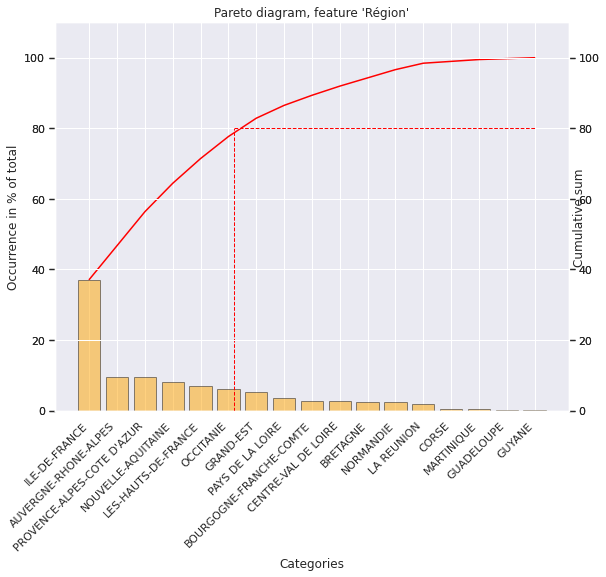

In [ ]:
# Instanciation
test_pareto = quality_tools.Pareto(dataframe=isf_df, feature='Région')

# General information
test_pareto.purpose = 'Identify the most concerned regions of France'
test_pareto.scale = 'France'
test_pareto.process = 'Tax'
test_pareto.line = 'N/A'
test_pareto.product = 'French taxpayers'
test_pareto.date = '31/12/2016'
test_pareto.shift = 'N/A'
test_pareto.divers = 'This is a test on how Pareto charts work.'

# Plot
test_pareto.plot()

In [ ]:
stop

## 7 Correlation diagram

In [ ]:
constants_df = upload_csv(path=PATH,
                          file='7_constants.csv',
                          df_variable='constants_df',
                          df_name='Constants dataframe')
data_df = upload_csv(path=PATH,
                     file='7_data.csv',
                     df_variable='data_df',
                     df_name='Values dataframe')

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat


class CorrelationDiagram():#QualityTool
    '''
    '''
    def __init__(self, data):
        '''
        Save the input data as arguments of the class.
        '''
        self.data = pd.DataFrame(data)
        self.data = self.data.dropna()
        self.list1 = self.data.iloc[:, 0]
        self.list2 = self.data.iloc[:, 1]


    def clean_data(self):
        '''

        '''


    def keypoints_coordinates(self, list1, list2):
        '''
        Given two lists, compute the average value, the standard deviation.
        Returns the coordinates of the four points that will form the cross,
        plus the coordinates of the intersection point.
        '''
        med_1 = stat.median(list1)
        std_1 = stat.stdev(list1)
        med_2 = stat.median(list2)
        std_2 = stat.stdev(list2)
        left_point = (med_1 - 3 * std_1, med_2)
        right_point = (med_1 + 3 * std_1, med_2)
        down_point = (med_1, med_2 - 3 * std_2)
        up_point = (med_1, med_2 + 3 * std_2)
        central_point = (med_1, med_2)

        return left_point, right_point, down_point, up_point, central_point

    def plot(self):
        '''

        '''
        #sns.regplot(self.list1, self.list2)
        #sns.relplot(x=self.list1, y=self.list2, hue = self.list1)
        g = sns.jointplot(self.list1, self.list2, kind="reg")
        g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
        #l_point, r_point, d_point, u_point, c_point = self.keypoints_coordinates(
        #    self.list1, self.list2)
        #hori_x_values = [l_point[0], r_point[0]]
        #hori_y_values = [l_point[1], r_point[1]]
        #vert_x_values = [d_point[0], u_point[0]]
        #vert_y_values = [d_point[1], u_point[1]]
        #plt.plot(hori_x_values, hori_y_values, color='orange')
        #plt.plot(vert_x_values, vert_y_values, color='c')
        # Identify the zones
        #plt.text(x=r_point[0]*0.9, y=u_point[1]*0.9, s='I',
        #         bbox=dict(facecolor='none', edgecolor='k', pad=5.0))
        #plt.text(x=r_point[0]*0.9, y=d_point[1]*1.1, s='II',
        #         bbox=dict(facecolor='none', edgecolor='k', pad=5.0))
        #plt.text(x=l_point[0]*0.9, y=d_point[1]*1.1, s='III',
        #         bbox=dict(facecolor='none', edgecolor='k', pad=5.0))
        #plt.text(x=l_point[0]*0.9, y=u_point[1]*0.9, s='IV',
        #         bbox=dict(facecolor='none', edgecolor='k', pad=5.0))

In [ ]:
my_corr_diag = CorrelationDiagram(data_df)
my_corr_diag.plot()